In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from category_encoders import *
import xgboost as xgb
from sklearn import svm
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split




In [2]:
data = pd.read_csv("parfumo_data.csv")
data = data.drop(['name'], axis=1)
data =data.dropna()


In [3]:
y = data.filter(["rating"])

## Eval Accords

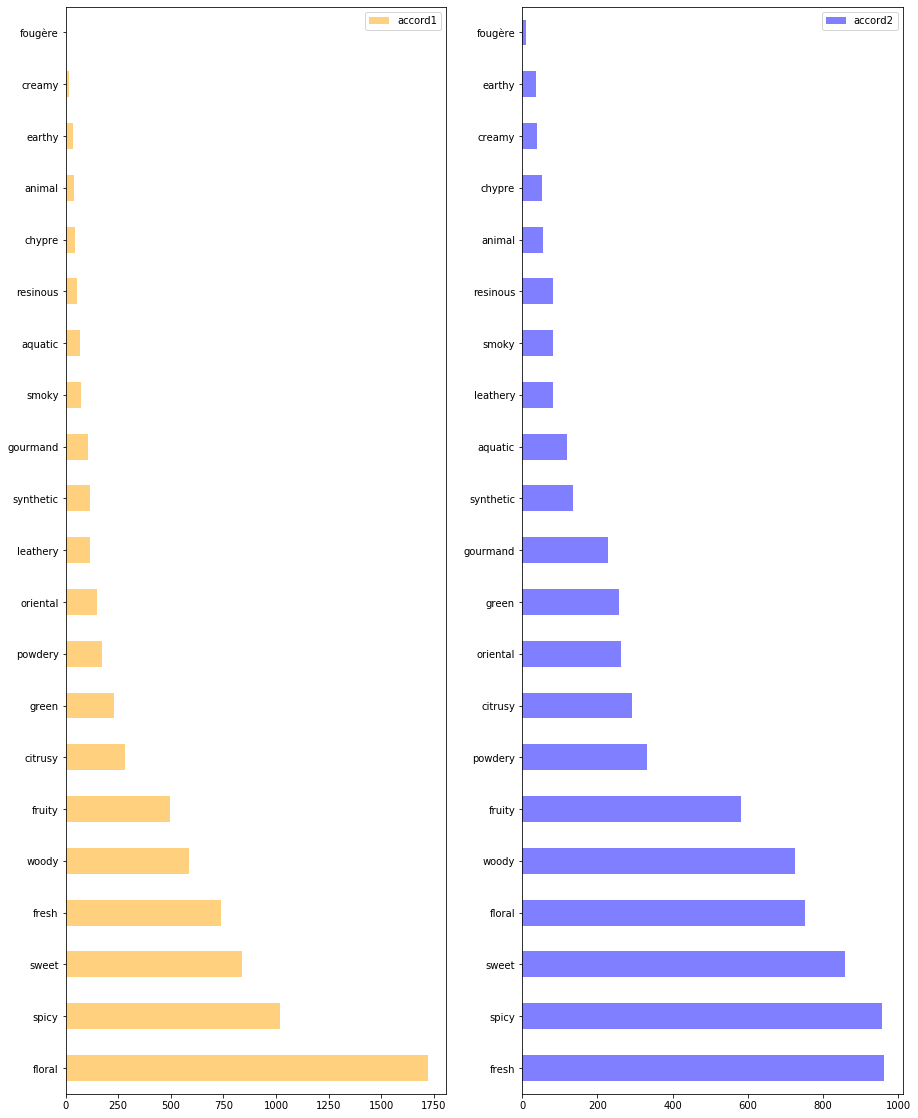

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,20))
data["accord1"].value_counts().plot(kind="barh", alpha=0.5, legend=True, color="orange", ax=axes[0])
data["accord2"].value_counts().plot(kind="barh", alpha=0.5, legend=True, color="blue", ax=axes[1])


In [5]:
print(data['accord1'].value_counts())

floral       1722
spicy        1019
sweet         839
fresh         741
woody         585
fruity        494
citrusy       284
green         230
powdery       173
oriental      147
leathery      117
synthetic     116
gourmand      108
smoky          73
aquatic        68
resinous       53
chypre         46
animal         38
earthy         34
creamy         14
fougère         4
Name: accord1, dtype: int64


In [6]:
print(data['accord2'].value_counts())

fresh        963
spicy        956
sweet        857
floral       753
woody        725
fruity       582
powdery      333
citrusy      291
oriental     262
green        258
gourmand     228
synthetic    136
aquatic      118
leathery      83
smoky         82
resinous      81
animal        56
chypre        53
creamy        40
earthy        38
fougère       10
Name: accord2, dtype: int64


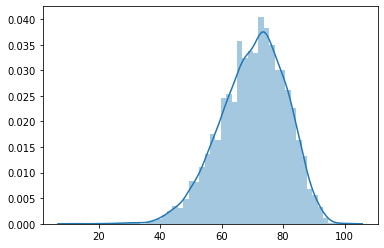

In [64]:
sns.distplot(data[['longevity']])

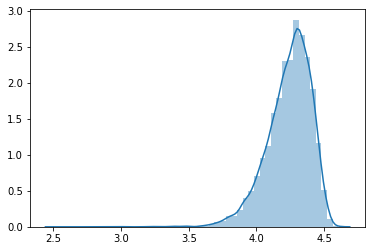

In [65]:
sns.distplot(np.log(data[['longevity']]))

# Removing Outliers

-0.2966950569228542


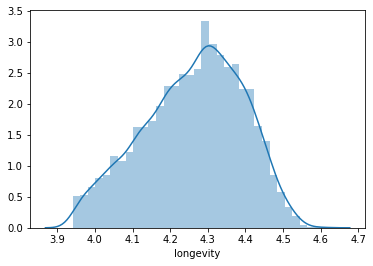

In [66]:
rating_no_outliers = data['longevity'].between(data['longevity'].quantile(.05), data['longevity'].quantile(.95))

rating_no_outliers = data['longevity'].where(data['longevity'] < data['longevity'].quantile(.95))
rating_no_outliers = data['longevity'].where(data['longevity'] > data['longevity'].quantile(.05))

log_ratings = np.log(rating_no_outliers)
print(log_ratings.skew())
sns.distplot(log_ratings)

data['ratings'] = log_ratings

## Encode Categories

In [86]:
data['accord1'] = data['accord1'].astype('category')
data['accord2'] = data['accord2'].astype('category')
data['brand'] = data['brand'].astype('category')

cols=["accord1", "accord2"]

In [87]:
display(data)

,brand,year,rating,votes,longevity,sillage,accord1,accord2,ratings
0,4160_Tuesdays,2013.0,76.7568,37.0,79.5000,76.5000,sweet,spicy,4.375757
1,4160_Tuesdays,2015.0,81.5714,35.0,75.4167,67.8261,gourmand,sweet,4.323029
2,4160_Tuesdays,2016.0,76.7742,31.0,83.9130,76.5217,fruity,floral,4.429781
4,4160_Tuesdays,2013.0,72.9630,27.0,70.2174,63.0435,sweet,woody,4.251596
5,4160_Tuesdays,2017.0,80.0000,20.0,79.4118,67.6471,spicy,woody,4.374647
...,...,...,...,...,...,...,...,...,...
8456,Zoologist,2019.0,80.8491,53.0,85.1020,79.7959,aquatic,spicy,4.443851
8457,Zoologist,2019.0,73.0769,52.0,86.2791,80.9302,green,spicy,4.457587
8458,Zoologist,2017.0,75.0000,51.0,77.6744,73.0233,green,fruity,4.352526
8459,Zoologist,2019.0,75.8163,49.0,81.7073,74.3902,floral,sweet,4.403143


In [143]:
no_brand = data.drop('brand', axis=1)
no_brand = no_brand.dropna()


enc = BinaryEncoder(cols=cols).fit(no_brand)
numerical_data = enc.transform(no_brand)

y = numerical_data.filter(["rating"])
X = numerical_data.drop(['rating', 'ratings'],axis=1)


# print(y)
# print(X)


In [144]:
display(X)



,year,votes,longevity,sillage,accord1_0,accord1_1,accord1_2,accord1_3,accord1_4,accord1_5,accord2_0,accord2_1,accord2_2,accord2_3,accord2_4,accord2_5
0,2013.0,37.0,79.5000,76.5000,0,1,0,0,1,1,0,1,0,0,1,0
1,2015.0,35.0,75.4167,67.8261,0,0,1,0,1,1,0,1,0,0,1,1
2,2016.0,31.0,83.9130,76.5217,0,0,1,0,1,0,0,0,0,1,1,1
4,2013.0,27.0,70.2174,63.0435,0,1,0,0,1,1,0,1,0,1,0,1
5,2017.0,20.0,79.4118,67.6471,0,1,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2019.0,53.0,85.1020,79.7959,0,0,0,0,1,0,0,1,0,0,1,0
8457,2019.0,52.0,86.2791,80.9302,0,0,1,1,0,0,0,1,0,0,1,0
8458,2017.0,51.0,77.6744,73.0233,0,0,1,1,0,0,0,0,1,0,1,0
8459,2019.0,49.0,81.7073,74.3902,0,0,0,1,1,1,0,1,0,0,1,1


## Split Data

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=2)


## 1HE - Trial 1 XGBoost

In [149]:
model = xgb.XGBRegressor(max_depth=4,
                        objective="reg:squarederror", 
                        learning_rate=0.05, 
                        subsample=0.9, 
                        colsample_bylevel=0.5,
                        reg_alpha=0.75, 
                        reg_lambda=0.5,
                        n_estimators=1000)  

In [150]:
folds = KFold(n_splits=10, random_state=5)
results = cross_val_score(model, x_train, y_train, cv=folds, scoring="neg_mean_squared_error")


In [151]:
print(results)

[-31.86545531 -37.68755912 -34.61006046 -35.52840189 -29.77174022
 -39.16981848 -33.25811243 -34.17027148 -33.20178567 -33.10210083]


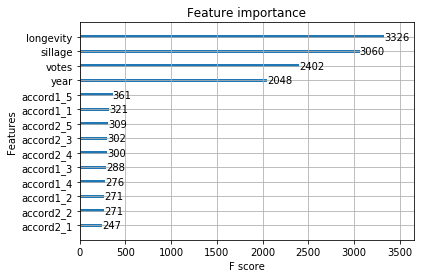

In [152]:
from xgboost import plot_importance
model.fit(x_train, y_train)

plot_importance(model)

In [156]:
model.fit(x_train, y_train)
yhat = np.array(model.predict(x_test))

print(yhat - np.array(y_test))

[[  1.79742745   0.75974587  -3.33585044 ...   3.63779763  -7.49632712
   -3.42963096]
 [  5.09382745   4.05614587  -0.03945044 ...   6.93419763  -4.19992712
   -0.13323096]
 [  3.80912745   2.77144587  -1.32415044 ...   5.64949763  -5.48462712
   -1.41793096]
 ...
 [ -4.85207255  -5.88975413  -9.98535044 ...  -3.01170237 -14.14582712
  -10.07913096]
 [ 20.26532745  19.22764587  15.13204956 ...  22.10569763  10.97157288
   15.03826904]
 [  8.14032745   7.10264587   3.00704956 ...   9.98069763  -1.15342712
    2.91326904]]


## 1HE - Trial 2 Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.1, fit_intercept=True)

In [ ]:
enet_results = cross_val_score(enet, x_train, y_train, cv=folds, scoring="neg_mean_squared_error")

In [ ]:
print(enet_results)

In [ ]:
enet.fit(x_train, y_train)

feat_imp = pd.Series(index = x_train.columns, data = np.abs(enet.coef_))
feat_imp.sort_values().plot(kind = 'bar', figsize = (18,6))